In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## DATA

Empezaremos por considerar, para el periodo que transcurre de Abril 2019 (desde que existen registros de Enhanced Commerce) hasta Enero 2021 las siguientes variables:
 - 'ga:productSKU'
 - 'ga:pagePath'
 - 'ga:dateHourMinute'
 - 'ga:pageDepth'
 - 'ga:sessionCount'
 - 'ga:daysSinceLastSession'
 - 'ga:sourceMedium'
 - 'ga:productListViews'
 - 'ga:productListClicks'
 - 'ga:productDetailViews'
 - 'ga:productAddsToCart'

In [2]:
!ls ../data/

df_pDepth_Scount_daysSLS_srceMed_2019.csv
df_pDepth_Scount_daysSLS_srceMed_2020.csv
df_pDepth_Scount_daysSLS_srceMed_apr19.csv
df_pDepth_Scount_daysSLS_srceMed_apr20.csv
df_pDepth_Scount_daysSLS_srceMed_aug19.csv
df_pDepth_Scount_daysSLS_srceMed_aug20.csv
df_pDepth_Scount_daysSLS_srceMed_dec19.csv
df_pDepth_Scount_daysSLS_srceMed_dec20.csv
df_pDepth_Scount_daysSLS_srceMed_feb20.csv
df_pDepth_Scount_daysSLS_srceMed_jan20.csv
df_pDepth_Scount_daysSLS_srceMed_jan21.csv
df_pDepth_Scount_daysSLS_srceMed_jul19.csv
df_pDepth_Scount_daysSLS_srceMed_jul20.csv
df_pDepth_Scount_daysSLS_srceMed_jun19.csv
df_pDepth_Scount_daysSLS_srceMed_jun20.csv
df_pDepth_Scount_daysSLS_srceMed_mar20.csv
df_pDepth_Scount_daysSLS_srceMed_may19.csv
df_pDepth_Scount_daysSLS_srceMed_may20.csv
df_pDepth_Scount_daysSLS_srceMed_nov19.csv
df_pDepth_Scount_daysSLS_srceMed_nov20.csv
df_pDepth_Scount_daysSLS_srceMed_oct19.csv
df_pDepth_Scount_daysSLS_srceMed_oct20.csv
df_pDepth_Scount_daysSLS_srceMed_sep19.csv
df_pDepth_Sco

In [3]:
df_pDepth_Scount_daysSLS_srceMed_2019=pd.read_csv('../data/df_pDepth_Scount_daysSLS_srceMed_2019.csv')
print(df_pDepth_Scount_daysSLS_srceMed_2019.shape)
df_pDepth_Scount_daysSLS_srceMed_2020=pd.read_csv('../data/df_pDepth_Scount_daysSLS_srceMed_2020.csv')
print(df_pDepth_Scount_daysSLS_srceMed_2020.shape)
df_pDepth_Scount_daysSLS_srceMed_jan21=pd.read_csv('../data/df_pDepth_Scount_daysSLS_srceMed_jan21.csv')
print(df_pDepth_Scount_daysSLS_srceMed_jan21.shape)

(103489, 13)


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2885547, 13)
(983598, 12)


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(df_pDepth_Scount_daysSLS_srceMed_2019.columns)
print("")
print(df_pDepth_Scount_daysSLS_srceMed_2020.columns)
print("")
print(df_pDepth_Scount_daysSLS_srceMed_jan21.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:productSKU', 'ga:pagePath',
       'ga:dateHourMinute', 'ga:pageDepth', 'ga:sessionCount',
       'ga:daysSinceLastSession', 'ga:sourceMedium', 'ga:productListViews',
       'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:productSKU', 'ga:pagePath',
       'ga:dateHourMinute', 'ga:pageDepth', 'ga:sessionCount',
       'ga:daysSinceLastSession', 'ga:sourceMedium', 'ga:productListViews',
       'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

Index(['Unnamed: 0', 'ga:productSKU', 'ga:pagePath', 'ga:dateHourMinute',
       'ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:sourceMedium', 'ga:productListViews', 'ga:productListClicks',
       'ga:productDetailViews', 'ga:productAddsToCart'],
      dtype='object')


In [5]:
df_pDepth_Scount_daysSLS_srceMed_2020.head(3)

,Unnamed: 0,Unnamed: 0.1,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,0,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141125,12,407,0,google / organic,0,1,1,0
1,1,1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0
2,2,2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0


In [6]:
df_pDepth_Scount_daysSLS_srceMed_2019.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
print(df_pDepth_Scount_daysSLS_srceMed_2019.shape)
df_pDepth_Scount_daysSLS_srceMed_2020.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
print(df_pDepth_Scount_daysSLS_srceMed_2020.shape)
df_pDepth_Scount_daysSLS_srceMed_jan21.drop('Unnamed: 0', axis=1, inplace=True)
print(df_pDepth_Scount_daysSLS_srceMed_jan21.shape)

(103489, 11)
(2885547, 11)
(983598, 11)


In [7]:
df = pd.concat([df_pDepth_Scount_daysSLS_srceMed_2020,df_pDepth_Scount_daysSLS_srceMed_jan21])
df.shape

(3869145, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869145 entries, 0 to 983597
Data columns (total 11 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:pagePath              object
 2   ga:dateHourMinute        object
 3   ga:pageDepth             object
 4   ga:sessionCount          object
 5   ga:daysSinceLastSession  object
 6   ga:sourceMedium          object
 7   ga:productListViews      int64 
 8   ga:productListClicks     int64 
 9   ga:productDetailViews    int64 
 10  ga:productAddsToCart     int64 
dtypes: int64(4), object(7)
memory usage: 354.2+ MB


In [9]:
df["ga:pageDepth"]=pd.to_numeric(df["ga:pageDepth"])
df["ga:sessionCount"]=pd.to_numeric(df["ga:sessionCount"])
df["ga:daysSinceLastSession"]=pd.to_numeric(df["ga:daysSinceLastSession"])

ValueError: Unable to parse string "(other)" at position 2885547

In [10]:
df.iloc[2885547]

ga:productSKU              (other)
ga:pagePath                (other)
ga:dateHourMinute          (other)
ga:pageDepth               (other)
ga:sessionCount            (other)
ga:daysSinceLastSession    (other)
ga:sourceMedium            (other)
ga:productListViews          53386
ga:productListClicks           215
ga:productDetailViews         3050
ga:productAddsToCart           265
Name: 0, dtype: object

In [11]:
df.drop(df.index[2885547], inplace=True)

In [12]:
df["ga:pageDepth"]=pd.to_numeric(df["ga:pageDepth"])
df["ga:sessionCount"]=pd.to_numeric(df["ga:sessionCount"])
df["ga:daysSinceLastSession"]=pd.to_numeric(df["ga:daysSinceLastSession"])

In [13]:
df.dtypes

ga:productSKU              object
ga:pagePath                object
ga:dateHourMinute          object
ga:pageDepth                int64
ga:sessionCount             int64
ga:daysSinceLastSession     int64
ga:sourceMedium            object
ga:productListViews         int64
ga:productListClicks        int64
ga:productDetailViews       int64
ga:productAddsToCart        int64
dtype: object

## TARGET

In [14]:
print("No. observations per class")
print(df['ga:productAddsToCart'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart'].value_counts(normalize=True))

No. observations per class
0     3804874
1       63465
2         650
3          75
4          29
5          20
6          10
7           9
8           2
9           2
11          2
12          2
10          1
13          1
24          1
Name: ga:productAddsToCart, dtype: int64

% observations per class
0     98.338934
1      1.640286
2      0.016800
3      0.001938
4      0.000750
5      0.000517
6      0.000258
7      0.000233
8      0.000052
9      0.000052
11     0.000052
12     0.000052
10     0.000026
13     0.000026
24     0.000026
Name: ga:productAddsToCart, dtype: float64


Recordemos que cada fila recoge un(os) determinado(s) hit(s) ('ga:productListViews', 'ga:productListClicks', 'ga:productDetailViews' y 'ga:productAddsToCart') para un determinado producto, en una determinada url y a una determinada fecha y hora. El resto de dimensiones recogen características del usuario o de la sesión:
- 'ga:pageDepth' : número de pagínas vistas en la página durante la sesión hasta ese momento
- 'ga:sessionCount : numero total de sesiones a la página del 'usuario'.
- 'ga:daysSinceLastSession': días que han transcurrido desde la última sesión del 'usuario'.
- 'ga:sourceMedium': procedencia del usuario.

Como ya se vio en el Notebook "Data_Collection", algunas observaciones recogen más de un click en el botón "Añadir al carrito". 

En aquel momento, para el periodo de 7 días analizado, se concluyó que aquellas referencias correspondían mayoritariamente a un mismo usuario que había presionado varias veces sobre el botón y no a una agregación de usuarios. Veamos en este caso:

In [15]:
addsToCart_higher_one = df[df["ga:productAddsToCart"]>1]
addsToCart_higher_one.shape

(804, 11)

Sólo el 0,02% de las observaciones recogen valores superiores a 1 en la variable target "ga:productAddsToCart".

In [16]:
addsToCart_higher_one.shape[0]/df.shape[0]*100

0.020779795422397156

En principio más de la mitad proceden de Motores de Búsqueda con lo que parece poco probable que varios usuarios con las mismas caracteristicas coincidan en buscar el mismo producto y hagan click en el boton de añadir al carrito el mismo día a la misma hora:

In [17]:
addsToCart_higher_one['ga:sourceMedium'].value_counts()

google / organic                   277
google / cpc                       206
(direct) / (none)                  132
sendinblue / email                  91
instagram.com / referral            39
l.instagram.com / referral          21
bing / organic                       6
youtube.com / referral               6
m.facebook.com / referral            6
IGShopping / Social                  4
idealo.es / referral                 3
linktr.ee / referral                 2
Facebook tráfico / CPC               2
l.facebook.com / referral            2
webanalitica.es / referral           2
secure.comnpay.com / referral        1
es.search.yahoo.com / referral       1
yahoo / organic                      1
btodigital.lpages.co / referral      1
vogue.es / referral                  1
Name: ga:sourceMedium, dtype: int64

In [18]:
addsToCart_higher_one.groupby(['ga:sourceMedium','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False)

,,ga:dateHourMinute
ga:sourceMedium,ga:productAddsToCart,
google / organic,2,227
google / cpc,2,145
(direct) / (none),2,112
sendinblue / email,2,79
instagram.com / referral,2,33
google / cpc,3,29
google / organic,3,25
l.instagram.com / referral,2,21
google / cpc,4,11


De tratarse de un mismo usuario, tiene sentido que presione varias veces sobre el botón, bien para añadir más cantidad de producto, bien por un error suyo o en la url:

In [19]:
print(addsToCart_higher_one.groupby(['ga:pagePath','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).shape)
addsToCart_higher_one.groupby(['ga:pagePath','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(20)

(356, 1)


,,ga:dateHourMinute
ga:pagePath,ga:productAddsToCart,
/es/pedido,2,80
/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html,2,29
/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html,2,24
/es/pedido,3,24
/parafarmacia/es/carrito?action=show,2,20
/es/top-ventas/7143-unique-green-collagen.html,2,18
/es/,2,15
/parafarmacia/es/carrito,2,15
/es/pedido,5,9


In [20]:
print(addsToCart_higher_one.groupby(['ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).shape)
addsToCart_higher_one.groupby(['ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(20)

(395, 1)


,,ga:dateHourMinute
ga:productSKU,ga:productAddsToCart,
1391,2,58
7143,2,31
6339,2,29
4393,2,15
6337,2,11
6285,2,11
6643,2,11
7212,2,10
4599,2,10


In [21]:
print(addsToCart_higher_one['ga:productSKU'].nunique())
print(addsToCart_higher_one['ga:pagePath'].nunique())

307
285


In [22]:
print(addsToCart_higher_one.groupby(['ga:pagePath','ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).shape)
addsToCart_higher_one.groupby(['ga:pagePath','ga:productSKU','ga:productAddsToCart'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(20)

(512, 1)


,,,ga:dateHourMinute
ga:pagePath,ga:productSKU,ga:productAddsToCart,
/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html,1391,2,29
/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html,6339,2,24
/es/top-ventas/7143-unique-green-collagen.html,7143,2,18
/es/pedido,1391,2,12
/es/manchas/6643-gema-herrerias-gh-10-antiox-vis-comprar-oferta.html,6643,2,9
/es/top-ventas/6337-skinperfection-bluevert-complete-day-serum-30-comprar-madrid-arturo.html,6337,2,8
/es/top-ventas/6285-retinol-03-gema-herrerias-serum-03-retinol-np-COMPRAR-OFERTA-MADRID.html,6285,2,8
/es/top-ventas/1306-farma-dorsch-go-organic-champu-500-ml-8470001740687.html,1306,2,8
/es/contorno-de-ojos-para-ojera-oscura/4892-gh-funcion-global-gema-herrerias-contorno-ojos.html,4892,2,7


En general, los datos resultan bastante coherentes y parecen soportar la idea de que se añaden varias unidades al carrito. Veamos aquellos casos en los que las cantidades superan las 4 unidades:

In [23]:
addsToCart_higher_four= addsToCart_higher_one[addsToCart_higher_one['ga:productAddsToCart']>4]
print(addsToCart_higher_four.shape)
addsToCart_higher_four

(50, 11)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
445357,6539,/parafarmacia/es/pedido,202004111240,27,1,0,google / organic,0,0,0,6
1609898,1373,/es/pedido,202011101627,12,1,0,(direct) / (none),0,0,0,5
1732672,4196,/es/pedido,202011221130,44,3,0,google / organic,0,0,0,5
1768389,4393,/es/pedido,202011181409,6,17,0,sendinblue / email,0,0,0,6
1838127,4893,/es/pedido,202011231859,10,1,0,google / cpc,0,0,0,5
1961965,6338,/es/serum/6338-skinperfection-by-bluevert-abso...,202011231110,23,21,0,google / organic,0,0,0,7
1975153,6339,/es/contorno-de-ojos-para-bolsas/6339-skinperf...,202011262031,5,1,0,(direct) / (none),0,0,2,5
2031284,6593,/es/pedido,202011111523,2,2,0,(direct) / (none),0,0,0,5
2378303,7425,/es/pedido,202011231509,5,5,0,google / cpc,0,0,0,12
2438581,1177,/es/soluciones-micelares/1177-gh-solucion-mice...,202012271727,4,1,0,google / cpc,0,0,1,5


In [24]:
addsToCart_higher_four[addsToCart_higher_four['ga:sourceMedium'].str.contains('google')].shape

(37, 11)

Solo 50 observaciones cuentan con más de 4 registros 'ga:productAddsToCart', de los cuales 37 proceden de Google.

In [25]:
addsToCart_higher_four[~addsToCart_higher_four['ga:sourceMedium'].str.contains('google')]

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
1609898,1373,/es/pedido,202011101627,12,1,0,(direct) / (none),0,0,0,5
1768389,4393,/es/pedido,202011181409,6,17,0,sendinblue / email,0,0,0,6
1975153,6339,/es/contorno-de-ojos-para-bolsas/6339-skinperf...,202011262031,5,1,0,(direct) / (none),0,0,2,5
2031284,6593,/es/pedido,202011111523,2,2,0,(direct) / (none),0,0,0,5
275203,4393,/es/productos-gema-herrerias/4393-cristina-mit...,202101232150,4,1,0,youtube.com / referral,0,0,0,5
506721,6593,/es/pedido,202101081917,9,2,17,sendinblue / email,0,0,0,24
506722,6593,/es/pedido,202101081918,9,2,17,sendinblue / email,0,0,0,9
511850,6643,/es/manchas/6643-gema-herrerias-gh-10-antiox-v...,202101101617,5,1,0,idealo.es / referral,0,0,0,7
827861,7423,/es/pedido,202101141638,25,1,0,(direct) / (none),0,0,0,6
964327,7827,/es/champus/7827-my-organics-thickening-shampo...,202101232053,9,4,0,instagram.com / referral,0,0,2,6


En aquellas observaciones que no corresponden con Google vemos, bien 'ga:pageDepth' muy elevados, bien usuarios recurrentes.  En ambos casos, la posibilidad de que usuarios con esas mismas caracteristicas coincidan en la misma fecha y a la misma hora, añadiendo el mismo producto al carrito, resulta improbable. 

En cuanto a los casos de las 9, 11 y 24 supuestas unidades, corresponden a mascarillas y protectores de mascarillas, con lo que resultan razonables dichas cantidades.

Por tanto, en principio, consideraremos cada observación como un usuario único y, de cara a tratar nuestro modelo como una clasificación, consideraremos los valores superiores a 1 en "ga:productAddsToCart" como una conversión: 



In [26]:
data=df.copy()
data['ga:productAddsToCart_transf']=data["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

In [27]:
print("No. observations per class")
print(data['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*data['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3804874
1      64269
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.338934
1     1.661066
Name: ga:productAddsToCart_transf, dtype: float64


Observamos que nuestras clases están claramente desbalanceadas. Sólo en un 1,66% de nuestras observaciones se añade un producto al carrito. 

Dado que nuestros resultados en el Baseline fueron muy razonables en este sentido, de momento, no trataremos este posible problema. 

## FEATURES

Empezaremos evaluando y analizando las variables numéricas disponibles.

### Product List Views

Esta variable recoge el número de veces que el producto apareció en una lista. 

En nuestro caso, esta columna nos da información sobre si el producto de la observación en cuestión apareció en una lista (>= 1) o no (0) y si apareció el número de veces que lo hizo en dicha lista.

En el conjunto de datos, adopta valores entre 0 y 7, aunque más del 96% de las observaciones es 0 o 1:

In [28]:
print("No. observations per class")
print(data['ga:productListViews'].value_counts())
print("")

print("% observations per class")
print(100*data['ga:productListViews'].value_counts(normalize=True))

No. observations per class
1    3154723
0     586425
2     119565
3       7485
4        800
5        120
6         23
7          2
Name: ga:productListViews, dtype: int64

% observations per class
1    81.535446
0    15.156457
2     3.090219
3     0.193454
4     0.020676
5     0.003101
6     0.000594
7     0.000052
Name: ga:productListViews, dtype: float64


<AxesSubplot:xlabel='ga:productListViews', ylabel='count'>

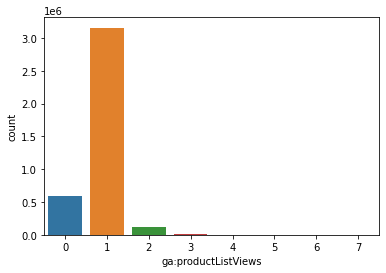

In [35]:
sns.countplot(data=data,x=data['ga:productListViews'])

Veamos cómo se relaciona con nuestra variable target:

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productListViews'>

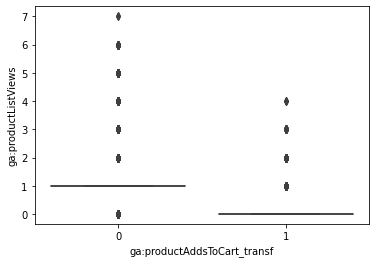

In [37]:
sns.boxplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productListViews'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productListViews'>

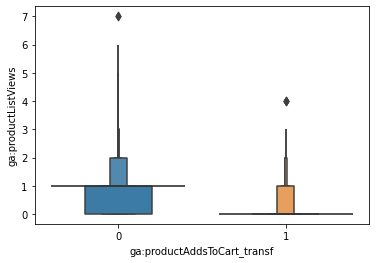

In [34]:
sns.boxenplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productListViews'])

In [45]:
data.groupby(['ga:productListViews','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(50)

,,ga:dateHourMinute
ga:productListViews,ga:productAddsToCart_transf,
1,0,3151112
0,0,526055
2,0,119298
0,1,60370
3,0,7467
1,1,3611
4,0,797
2,1,267
5,0,120


In [47]:
listviews_per_conversion = data.pivot_table(index='ga:productListViews',columns='ga:productAddsToCart_transf',values='ga:dateHourMinute', aggfunc='count')
listviews_per_conversion

ga:productAddsToCart_transf,0,1
ga:productListViews,,
0,526055.0,60370.0
1,3151112.0,3611.0
2,119298.0,267.0
3,7467.0,18.0
4,797.0,3.0
5,120.0,NaN
6,23.0,NaN
7,2.0,NaN


<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productListViews'>

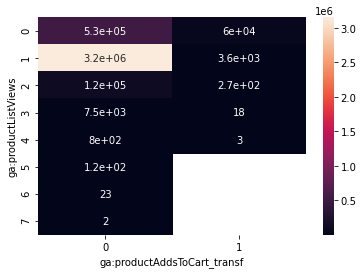

In [48]:
sns.heatmap(listviews_per_conversion,annot=True)

En términos generales, parece que cuando se añade un producto al carrito, la variable 'ga:productListViews' suele adoptar como valor 0. Esto podría indicar que en general los productos suelen añadirse en la propia página del producto ('Detail view') y no en listas:

In [46]:
data_target_1 = data[data["ga:productAddsToCart_transf"]==1]
print(data_target_1.shape)
data_target_1.head(3)

(64269, 12)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
40,1004,/parafarmacia/es/carrito?action=show,202001141028,3,2,41,google / cpc,0,0,0,1,1
41,1004,/parafarmacia/es/carrito?action=show,202001151446,14,1,0,google / cpc,0,0,0,1,1
42,1004,/parafarmacia/es/carrito?action=show,202001151737,9,1,0,(direct) / (none),0,0,0,1,1


In [50]:
data_target_1.groupby(['ga:productListViews','ga:productDetailViews'])[['ga:productAddsToCart_transf']].count().sort_values(by='ga:productAddsToCart_transf', ascending=False)

ga:productAddsToCart_transf
ga:productListViews ga:productDetailViews                             
0                   0                                            41498
                    1                                            16016
1                   0                                             3558
0                   2                                             2463
                    3                                              319
2                   0                                              266
0                   4                                               68
1                   1                                               45
3                   0                                               18
1                   2                                                7
0                   5                                                5
4                   0                                                3
0                   9                                                1
1                   3                                                1
2                   1                                                1

En efecto, lo productos suelen añadirse al carrito con más frecuencia desde la ficha de producto que desde páginas tipo lista. Por ejemplo, las observaciones con 0 en 'productListViews' y 1 en 'productDetailViews' suman 16.016 registros con 'addToCart' positivo frente a las observaciones con 1 en 'productListViews' y 0 en 'productDetailViews'que suman 3.558 registros.

Cabe recordar que en las fichas de producto, siempre aparece una lista de recomendación del tipo 'También podría interesarle", lo que explica que haya combinaciones con valores positivos en 'productListViews' y 'productDetailViews' simultaneamente. Quiere decir que al cliente se le está recomendando la misma referencia de producto de la observación en la lista de recomendados. 

En cambio, cuando 'productListViews' adopta valores positivos y 'productDetailViews' 0, la observación tendría lugar en una página tipo de lista exclusivamente. 

Ahora bien, existe una combinación inesperada que registra el mayor número de hits 'addToCart'(41.498 registros). El producto se añade al carrito pero no se le visualiza ni en una lista ni en una ficha de producto. Veamos con más detalle donde se están produciendo esos eventos:

In [61]:
noviews_hits = data_target_1[(data_target_1['ga:productListViews']==0) & (data_target_1['ga:productDetailViews']==0)]
print(noviews_hits.shape)
noviews_hits.head(50)

(41498, 12)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
40,1004,/parafarmacia/es/carrito?action=show,202001141028,3,2,41,google / cpc,0,0,0,1,1
41,1004,/parafarmacia/es/carrito?action=show,202001151446,14,1,0,google / cpc,0,0,0,1,1
42,1004,/parafarmacia/es/carrito?action=show,202001151737,9,1,0,(direct) / (none),0,0,0,1,1
43,1004,/parafarmacia/es/pedido,202001151454,14,1,0,google / cpc,0,0,0,1,1
75,1007,/parafarmacia/es/busqueda?orderby=position&ord...,202001052133,14,3,2,google / organic,0,0,0,1,1
76,1007,/parafarmacia/es/carrito?action=show,202001021432,5,1,0,google / organic,0,0,0,1,1
77,1007,/parafarmacia/es/carrito?action=show,202001030920,16,1,0,google / cpc,0,0,0,1,1
78,1007,/parafarmacia/es/carrito?action=show,202001231456,5,8,0,(direct) / (none),0,0,0,1,1
410,1013,/parafarmacia/es/479-densificador,202001152125,29,1,0,(direct) / (none),0,0,0,1,1
411,1013,/parafarmacia/es/busqueda?orderby=position&ord...,202001131316,12,2,5,(direct) / (none),0,0,0,1,1


In [99]:
noviews_hits_pagePath = noviews_hits['ga:pagePath'].str.split('/',expand=True)
noviews_hits_pagePath.sample(50)

,0,1,2,3,4,5
228042,,parafarmacia,es,carrito,None,None
115471,,medicamentos,es,carrito?action=show,None,None
538932,,es,perfumes-y-fragancias,6711-maube-colibua-edt-julie.html,None,None
1307385,,parafarmacia,es,carrito?action=show,None,None
315652,,parafarmacia,es,carrito?action=show,None,None
115449,,parafarmacia,es,carrito,None,None
2857003,,es,tonicos-premium,7557-pack-tonico-equilibrante-solar-antiaging-...,None,None
139200,,parafarmacia,es,605-home-novedades,None,None
911177,,parafarmacia,es,carrito?action=show,None,None
1800014,,es,,None,None,None


En un 75% de los casos, sucede en pagePath que inicia con la página 'parafarmacia/es':

In [83]:
noviews_hits_pagePath[1].value_counts(normalize=True)

parafarmacia    0.758832
es              0.216083
medicamentos    0.024845
galileo         0.000193
pt              0.000048
Name: 1, dtype: float64

In [85]:
noviews_hits_pagePath[noviews_hits_pagePath[1]=='parafarmacia'][2].value_counts(normalize=True)

es                                                                                                                                                            0.998444
pt                                                                                                                                                            0.001207
carrito?action=show                                                                                                                                           0.000254
blog                                                                                                                                                          0.000064
index.php?fc=module&module=leoblog&rewrite=flavo-c-melatonin-ultraglican-rutina-de-isdin-antioxidante-protege-de-dia-repara-de-noche&id=25&controller=blog    0.000032
Name: 2, dtype: float64

En un 70% de los casos, el path finaliza en carrito (lo que tendría sentido por tratarse de una página especial que no hace referencia a listas o fichas de producto) pero también observamos con mucha menor frecuencia otras páginas regulares:

In [87]:
noviews_hits_pagePath[(noviews_hits_pagePath[1]=='parafarmacia') & (noviews_hits_pagePath[2]=='es')][3].value_counts(normalize=True).head(50)

carrito?action=show                                                                            0.503196
carrito                                                                                        0.213320
                                                                                               0.081931
pedido                                                                                         0.013072
contenido                                                                                      0.010019
iniciar-sesion?back=my-account                                                                 0.004103
blog                                                                                           0.004071
363_heliocare                                                                                  0.003785
mi-cuenta                                                                                      0.003085
127-cosmetica                                                   

Puede tratarse de un problema de configuración de Google Analytics en el caso de las páginas anidadas a Parafarmacia. Veamos si está recogiendo list views o detail views en el conjunto de nuestro dataset:

In [82]:
data[data['ga:pagePath'].str.startswith('/parafarmacia/')]

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0,0
2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0,0
3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
4,1002,/parafarmacia/es/147-champus,202001162342,14,3,0,google / cpc,1,0,0,0,0
5,1002,/parafarmacia/es/147-champus,202001170029,5,1,0,google / organic,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2409679,977,/parafarmacia/es/331_fridda-dorsch-farma-dorsch,202011011933,16,7,0,google / cpc,2,0,0,0,0
2409680,977,/parafarmacia/es/977-farma-dorsch-contorno-ojo...,202011010118,3,1,0,google / cpc,0,1,1,0,0
2409681,977,/parafarmacia/es/977-farma-dorsch-contorno-ojo...,202011011116,1,1,0,google / cpc,0,0,1,0,0
2411617,993,/parafarmacia/es/993-cepillo-dental-adulto-vit...,202011011550,163,1,0,google / organic,0,1,1,0,0


En principio, existen observaciones cuyo primer page path es parafarmacia y si que recogen ListViews y DetailViews positivos. Veamos en el conjunto de datos (con addtocart igual a 0 y 1), qué observaciones tienen ListViews y DetailViews igual a 0 simultaneamente:

In [95]:
data_noviews= data[(data['ga:productListViews']==0) & (data['ga:productDetailViews']==0)]
print("Total observations without Views: ", data_noviews.shape[0])
print("Observations addToCart=1 and Views=0: ", data_noviews[data_noviews['ga:productAddsToCart_transf']==1].shape[0])
print("Observations addToCart=0 and Views=0: ", data_noviews[data_noviews['ga:productAddsToCart_transf']==0].shape[0])

Total observations without Views:  46796
Observations addToCart=1 and Views=0:  41498
Observations addToCart=0 and Views=0:  5298


In [96]:
data_noviews.head(50)

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
40,1004,/parafarmacia/es/carrito?action=show,202001141028,3,2,41,google / cpc,0,0,0,1,1
41,1004,/parafarmacia/es/carrito?action=show,202001151446,14,1,0,google / cpc,0,0,0,1,1
42,1004,/parafarmacia/es/carrito?action=show,202001151737,9,1,0,(direct) / (none),0,0,0,1,1
43,1004,/parafarmacia/es/pedido,202001151454,14,1,0,google / cpc,0,0,0,1,1
75,1007,/parafarmacia/es/busqueda?orderby=position&ord...,202001052133,14,3,2,google / organic,0,0,0,1,1
76,1007,/parafarmacia/es/carrito?action=show,202001021432,5,1,0,google / organic,0,0,0,1,1
77,1007,/parafarmacia/es/carrito?action=show,202001030920,16,1,0,google / cpc,0,0,0,1,1
78,1007,/parafarmacia/es/carrito?action=show,202001231456,5,8,0,(direct) / (none),0,0,0,1,1
410,1013,/parafarmacia/es/479-densificador,202001152125,29,1,0,(direct) / (none),0,0,0,1,1
411,1013,/parafarmacia/es/busqueda?orderby=position&ord...,202001131316,12,2,5,(direct) / (none),0,0,0,1,1


En principio, el patrón vuelve a repetirse con páginas especiales:

In [72]:
data_noviews_pagePath = data_noviews['ga:pagePath'].str.split('/',expand=True)
data_noviews_pagePath

,0,1,2,3,4,5
40,,parafarmacia,es,carrito?action=show,None,None
41,,parafarmacia,es,carrito?action=show,None,None
42,,parafarmacia,es,carrito?action=show,None,None
43,,parafarmacia,es,pedido,None,None
75,,parafarmacia,es,busqueda?orderby=position&orderway=desc&search...,None,None
...,...,...,...,...,...,...
982740,,es,831-ampollas?page=2,None,None,None
982741,,es,831-ampollas?page=2,None,None,None
982908,,es,cuidado-corporal,995-isdinceutics-flavo-c-dia-y-noche-1010-ampo...,None,None
983297,,es,876-cuidado-de-la-piel-premium?page=5,None,None,None


In [98]:
data_noviews_pagePath[1].value_counts(normalize=True)

parafarmacia    0.674673
es              0.302654
medicamentos    0.022032
galileo         0.000513
pt              0.000128
Name: 1, dtype: float64

In [103]:
data_noviews_pagePath[3].value_counts(normalize=True).head(50)

carrito?action=show                                                                       0.371782
carrito                                                                                   0.167348
                                                                                          0.062018
iqitsearch                                                                                0.017381
6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html                         0.010224
pedido                                                                                    0.010131
1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html                             0.009620
356-gema-herrerias                                                                        0.009109
4393-cristina-mitre-gh5azelaics.html                                                      0.008249
contenido                                                                                 0.007343
6751-gema-

Aunque en mucha menos proporción, sigue habiendo URLs que parecen hacer referencia a categorías de producto con lo que deberían ser clasificadas como listViews y a fichas de producto con lo que debería existir registro de detailView. En cualquier caso, sabemos por nuestro MVP que el modelo capturaba gran parte de la varianza a pesar de esta inconsistencia asiq de momento seguiremos avanzando.

In [137]:
prueba = data.copy()

In [138]:
prueba.head(3)

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0,0
2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0,0
3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0


In [139]:
prueba['dateTime']=pd.to_datetime(prueba['ga:dateHourMinute'],format='%Y%m%d%H%M')

In [140]:
prueba

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,dateTime
1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0,0,2020-01-14 13:45:00
2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0,0,2020-01-08 09:32:00
3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0,2020-01-16 15:11:00
4,1002,/parafarmacia/es/147-champus,202001162342,14,3,0,google / cpc,1,0,0,0,0,2020-01-16 23:42:00
5,1002,/parafarmacia/es/147-champus,202001170029,5,1,0,google / organic,1,0,0,0,0,2020-01-17 00:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983593,999,/es/serum/1059-neostrata-skin-active-matrix-se...,202101120607,8,2,0,(direct) / (none),1,0,0,0,0,2021-01-12 06:07:00
983594,999,/es/serum/1059-neostrata-skin-active-matrix-se...,202101131547,30,1,0,google / organic,1,0,0,0,0,2021-01-13 15:47:00
983595,999,/es/serum/1059-neostrata-skin-active-matrix-se...,202101141618,11,3,4,(direct) / (none),1,0,0,0,0,2021-01-14 16:18:00
983596,999,/es/serum/1059-neostrata-skin-active-matrix-se...,202101181627,56,3,4,abcblogs.abc.es / referral,1,0,0,0,0,2021-01-18 16:27:00


In [ ]:
prueba.sort_values(by='dateTime')

In [125]:
prueba

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,1970-01-01 00:03:22.001141345,5,3,0,(direct) / (none),0,0,1,0,0
2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,1970-01-01 00:03:22.001080932,6,3,19,google / organic,0,1,1,0,0
3,1002,/parafarmacia/es/147-champus,1970-01-01 00:03:22.001161511,14,1,0,google / cpc,2,0,0,0,0
4,1002,/parafarmacia/es/147-champus,1970-01-01 00:03:22.001162342,14,3,0,google / cpc,1,0,0,0,0
5,1002,/parafarmacia/es/147-champus,1970-01-01 00:03:22.001170029,5,1,0,google / organic,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
983593,999,/es/serum/1059-neostrata-skin-active-matrix-se...,1970-01-01 00:03:22.101120607,8,2,0,(direct) / (none),1,0,0,0,0
983594,999,/es/serum/1059-neostrata-skin-active-matrix-se...,1970-01-01 00:03:22.101131547,30,1,0,google / organic,1,0,0,0,0
983595,999,/es/serum/1059-neostrata-skin-active-matrix-se...,1970-01-01 00:03:22.101141618,11,3,4,(direct) / (none),1,0,0,0,0
983596,999,/es/serum/1059-neostrata-skin-active-matrix-se...,1970-01-01 00:03:22.101181627,56,3,4,abcblogs.abc.es / referral,1,0,0,0,0


In [115]:
data_noviews["year"]=data_noviews["ga:dateHourMinute"].astype(str).str[:4]
data_noviews["month"]=data_noviews["ga:dateHourMinute"].astype(str).str[4:6]
data_noviews["day"]=data_noviews["ga:dateHourMinute"].astype(str).str[6:8]
data_noviews["hour"]=data_noviews["ga:dateHourMinute"].astype(str).str[8:10]
data_noviews["minute"]=data_noviews["ga:dateHourMinute"].astype(str).str[10:12]


<ipython-input-115-ed082882bcee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noviews["year"]=data_noviews["ga:dateHourMinute"].astype(str).str[:4]
<ipython-input-115-ed082882bcee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noviews["month"]=data_noviews["ga:dateHourMinute"].astype(str).str[4:6]
<ipython-input-115-ed082882bcee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [116]:
data_noviews

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,year,month,day,hour,minute
40,1004,/parafarmacia/es/carrito?action=show,202001141028,3,2,41,google / cpc,0,0,0,1,1,2020,01,14,10,28
41,1004,/parafarmacia/es/carrito?action=show,202001151446,14,1,0,google / cpc,0,0,0,1,1,2020,01,15,14,46
42,1004,/parafarmacia/es/carrito?action=show,202001151737,9,1,0,(direct) / (none),0,0,0,1,1,2020,01,15,17,37
43,1004,/parafarmacia/es/pedido,202001151454,14,1,0,google / cpc,0,0,0,1,1,2020,01,15,14,54
75,1007,/parafarmacia/es/busqueda?orderby=position&ord...,202001052133,14,3,2,google / organic,0,0,0,1,1,2020,01,05,21,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982740,995,/es/831-ampollas?page=2,202101081657,27,1,0,(direct) / (none),0,1,0,0,0,2021,01,08,16,57
982741,995,/es/831-ampollas?page=2,202101180128,19,2,9,google / organic,0,1,0,0,0,2021,01,18,01,28
982908,995,/es/cuidado-corporal/995-isdinceutics-flavo-c-...,202101232036,3,1,0,sendinblue / email,0,0,0,1,1,2021,01,23,20,36
983297,999,/es/876-cuidado-de-la-piel-premium?page=5,202101261403,12,4,0,google / cpc,0,1,0,0,0,2021,01,26,14,03


In [119]:
data_noviews[~data_noviews["ga:pagePath"].str.contains('carrito')]

,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,year,month,day,hour,minute
43,1004,/parafarmacia/es/pedido,202001151454,14,1,0,google / cpc,0,0,0,1,1,2020,01,15,14,54
75,1007,/parafarmacia/es/busqueda?orderby=position&ord...,202001052133,14,3,2,google / organic,0,0,0,1,1,2020,01,05,21,33
410,1013,/parafarmacia/es/479-densificador,202001152125,29,1,0,(direct) / (none),0,0,0,1,1,2020,01,15,21,25
411,1013,/parafarmacia/es/busqueda?orderby=position&ord...,202001131316,12,2,5,(direct) / (none),0,0,0,1,1,2020,01,13,13,16
783,1026,/parafarmacia/es/busqueda?orderby=position&ord...,202001082249,10,33,9,google / cpc,0,0,0,1,1,2020,01,08,22,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982740,995,/es/831-ampollas?page=2,202101081657,27,1,0,(direct) / (none),0,1,0,0,0,2021,01,08,16,57
982741,995,/es/831-ampollas?page=2,202101180128,19,2,9,google / organic,0,1,0,0,0,2021,01,18,01,28
982908,995,/es/cuidado-corporal/995-isdinceutics-flavo-c-...,202101232036,3,1,0,sendinblue / email,0,0,0,1,1,2021,01,23,20,36
983297,999,/es/876-cuidado-de-la-piel-premium?page=5,202101261403,12,4,0,google / cpc,0,1,0,0,0,2021,01,26,14,03


In [117]:
data_noviews["year"].value_counts()

2020    41176
2021     5620
Name: year, dtype: int64

In [118]:
data_noviews["month"].value_counts()

01    7402
11    6247
04    6072
05    5480
03    3926
06    3209
09    2939
10    2764
12    2341
07    2330
08    2111
02    1975
Name: month, dtype: int64

### Product Detail Views

Esta variable recoge el número de veces que se vio la ficha de un producto. 

En nuestro dataset, esta columna nos indica si el producto de la observación en cuestión fue visto (>=1) o no (0) en su paǵina específica (ficha de producto) y el número de veces que se vió dicha url en el transcurso del minuto que dura la observación.

En el conjunto de datos, adopta valores entre 0 y 13, aunque más del 98% de las observaciones es 0 o 1:

In [50]:
print("No. observations per class")
print(data['ga:productDetailViews'].value_counts())
print("")

print("% observations per class")
print(100*data['ga:productDetailViews'].value_counts(normalize=True))

No. observations per class
0     3328769
1      491687
2       40649
3        7356
4         551
5          89
6          26
7           6
8           5
9           3
12          1
13          1
Name: ga:productDetailViews, dtype: int64

% observations per class
0     86.033755
1     12.707905
2      1.050594
3      0.190120
4      0.014241
5      0.002300
6      0.000672
7      0.000155
8      0.000129
9      0.000078
12     0.000026
13     0.000026
Name: ga:productDetailViews, dtype: float64


<AxesSubplot:xlabel='ga:productDetailViews', ylabel='count'>

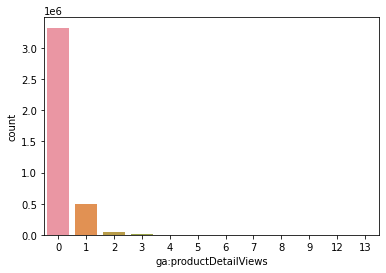

In [51]:
sns.countplot(data=data,x=data['ga:productDetailViews'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productDetailViews'>

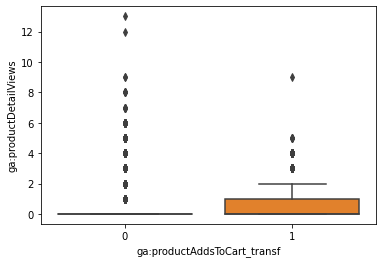

In [32]:
sns.boxplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productDetailViews'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productDetailViews'>

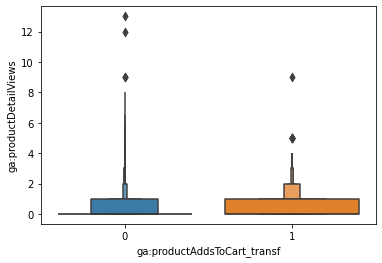

In [33]:
sns.boxenplot(data=data,x=data['ga:productAddsToCart_transf'],y=data['ga:productDetailViews'])

In [43]:
data.groupby(['ga:productListViews','ga:productDetailViews'])[['ga:productAddsToCart_transf']].mean().sort_values(by='ga:productAddsToCart_transf',ascending=False)

ga:productAddsToCart_transf
ga:productListViews ga:productDetailViews                             
0                   0                                         0.886785
                    9                                         0.333333
                    4                                         0.123412
2                   1                                         0.090909
1                   1                                         0.077320
                    3                                         0.066667
0                   2                                         0.060792
1                   2                                         0.059322
0                   5                                         0.056180
                    3                                         0.043472
                    1                                         0.032613
4                   0                                         0.003750
3                   0                                         0.002405
2                   0                                         0.002225
1                   0                                         0.001128
0                   13                                        0.000000
                    12                                        0.000000
                    8                                         0.000000
2                   2                                         0.000000
                    3                                         0.000000
0                   7                                         0.000000
                    6                                         0.000000
5                   0                                         0.000000
6                   0                                         0.000000
7                   0                                         0.000000

In [34]:
data.groupby(['ga:productDetailViews','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(50)

,,ga:dateHourMinute
ga:productDetailViews,ga:productAddsToCart_transf,
0,0,3283426
1,0,475625
0,1,45343
2,0,38179
1,1,16062
3,0,7036
2,1,2470
4,0,483
3,1,320


In [39]:
detailviews_per_conversion = data.pivot_table(index=['ga:productListViews','ga:productDetailViews'],columns='ga:productAddsToCart_transf',values='ga:dateHourMinute', aggfunc='count')
detailviews_per_conversion

KeyError: '1'

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='ga:productDetailViews'>

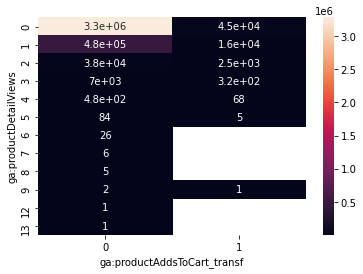

In [37]:
sns.heatmap(detailviews_per_conversion,annot=True)

In [44]:
list_detail_combi = data.pivot_table(index='ga:productListViews',columns='ga:productDetailViews',values='ga:productAddsToCart_transf')
list_detail_combi

ga:productDetailViews,0,1,2,3,4,5,6,7,8,9,12,13
ga:productListViews,,,,,,,,,,,,
0,0.886785,0.032613,0.060792,0.043472,0.123412,0.05618,0.0,0.0,0.0,0.333333,0.0,0.0
1,0.001128,0.077320,0.059322,0.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002225,0.090909,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.002405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.003750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='ga:productDetailViews', ylabel='ga:productListViews'>

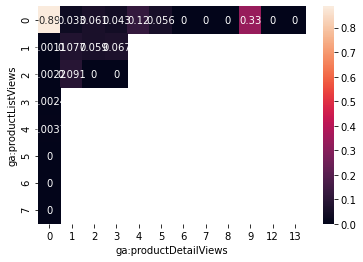

In [30]:
sns.heatmap(list_detail_combi,annot=True)

In [40]:
data[data['ga:productListViews']>2].shape

(8430, 12)

In [39]:
productListViews_higher_1 = data[data['ga:productListViews']>1]
print(productListViews_higher_1.shape)
productListViews_higher_1.head(50)

(127995, 12)


,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf
3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
1392,1090,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
1399,1100,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
1764,1129,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
3467,1175,/parafarmacia/es/busqueda?orderby=position&ord...,202001171125,12,2,4,IGShopping / Social,2,0,0,0,0
3667,1177,/parafarmacia/es/busqueda?orderby=position&ord...,202001171125,12,2,4,IGShopping / Social,2,0,0,0,0
3775,1178,/parafarmacia/es/busqueda?orderby=position&ord...,202001171125,12,2,4,IGShopping / Social,2,0,0,0,0
5962,1306,/parafarmacia/es/147-champus?page=2,202001161515,14,1,0,google / cpc,2,0,0,0,0
6245,1309,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0
6688,1310,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0,0


In [30]:
productListViews_higher_1.groupby(['ga:productSKU','ga:pagePath','ga:productListViews'])[['ga:dateHourMinute']].count().sort_values(by="ga:dateHourMinute",ascending=False).head(50)

,,,ga:dateHourMinute
ga:productSKU,ga:pagePath,ga:productListViews,
1113,/parafarmacia/es/,2,1828
1127,/parafarmacia/es/,2,1828
1049,/parafarmacia/es/,2,1807
1155,/parafarmacia/es/,2,1760
1159,/parafarmacia/es/,2,1344
1008,/parafarmacia/es/,2,1191
1021,/parafarmacia/es/,2,1191
1020,/parafarmacia/es/,2,1191
1045,/parafarmacia/es/,2,1131


In [31]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:pagePath"].nunique()

(127995, 12)


1938

In [32]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:productSKU"].nunique()

(127995, 12)


5002

In [33]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:sourceMedium"].value_counts()

(127995, 12)


google / organic                                 55279
(direct) / (none)                                31957
sendinblue / email                                9346
google / cpc                                      8098
instagram.com / referral                          7138
l.instagram.com / referral                        5524
facebook / cpc                                    2046
m.facebook.com / referral                         1225
linktr.ee / referral                              1211
cantabrialabs.es / referral                        807
btodigital.lpages.co / referral                    784
IGShopping / Social                                779
bing / organic                                     525
l.facebook.com / referral                          509
youtube.com / referral                             409
Facebook tráfico / CPC                             398
vogue.es / referral                                394
facebook.com / referral                            299
yahoo / or

In [34]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:productListClicks"].value_counts()

(127995, 12)


0    124362
1      3533
2        96
3         3
4         1
Name: ga:productListClicks, dtype: int64

In [35]:
print(productListViews_higher_1.shape)
productListViews_higher_1["ga:productDetailViews"].value_counts()

(127995, 12)


0    127965
2        16
1        11
3         3
Name: ga:productDetailViews, dtype: int64

In [65]:
data.groupby(['ga:productListViews','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by=["ga:productAddsToCart_transf","ga:dateHourMinute"],ascending=False).head(20)

,,ga:dateHourMinute
ga:productListViews,ga:productAddsToCart_transf,
0,1,60370
1,1,3611
2,1,267
3,1,18
4,1,3
1,0,3151112
0,0,526055
2,0,119298
3,0,7467


In [63]:
data.groupby(['ga:productSKU','ga:productAddsToCart_transf'])[['ga:dateHourMinute']].count().sort_values(by=["ga:productAddsToCart_transf","ga:dateHourMinute"],ascending=False).head(20)

,,ga:dateHourMinute
ga:productSKU,ga:productAddsToCart_transf,
1391,1,2216
6339,1,2031
4393,1,1515
6285,1,1482
6751,1,1151
7143,1,1116
6337,1,957
1306,1,857
6539,1,820
